# Step 0 : We import the necessary modules and files

In [8]:
import numpy as np
from scipy.stats import entropy
import pandas as pd
import math
import matplotlib.pyplot as plt
import wooldridge as woo
import statsmodels.formula.api as smf

In [9]:
dataFF_red_norm01 = pd.read_csv('dataFF_red_norm01.csv')
dataFF_red_norm_gauss = pd.read_csv('dataFF_red_norm_gauss.csv')

# Step 1 : We run first regressions

b: 
Intercept     -0.330156
Nb_doct_8km    4.493449
dtype: float64



Text(0.5, 0, 'nbDoc8km')

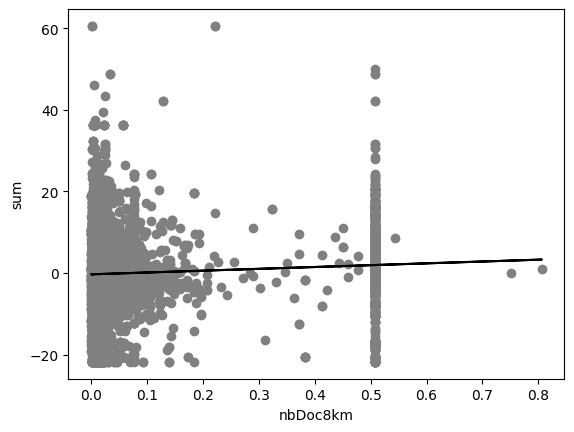

In [10]:
reg = smf.ols(formula='sum~ Nb_doct_8km', data=dataFF_red_norm_gauss)
results = reg.fit()
b = results.params
print(f'b: \n{b}\n')

# scatter plot and fitted values:
plt.plot('Nb_doct_8km', "sum", data=dataFF_red_norm_gauss, color='grey', marker='o', linestyle='')
plt.plot(dataFF_red_norm_gauss['Nb_doct_8km'], results.fittedvalues, color='black', linestyle='-')
plt.ylabel('sum')
plt.xlabel('nbDoc8km')

In [11]:
# print results using summary:
print(f'results.summary(): \n{results.summary()}\n')

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                    sum   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     36.41
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           1.68e-09
Time:                        14:02:41   Log-Likelihood:                -25145.
No. Observations:                6873   AIC:                         5.029e+04
Df Residuals:                    6871   BIC:                         5.031e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.3302      0.

In [12]:
reg = smf.ols(formula='sum~ Nb_doct_2km+Nb_doct_8km+Nb_doct_30km+Nb_doct_f_2km+Nb_doct_f_8km+Nb_doct_f_30km', data=dataFF_red_norm_gauss)
results = reg.fit()
b = results.params
print(f'b: \n{b}\n')


b: 
Intercept          -0.190482
Nb_doct_2km      -284.340807
Nb_doct_8km       -55.704942
Nb_doct_30km       -0.752252
Nb_doct_f_2km     518.731789
Nb_doct_f_8km     128.579315
Nb_doct_f_30km     -2.167043
dtype: float64



In [13]:
# print results using summary:
print(f'results.summary(): \n{results.summary()}\n')

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')
#vote1.describe()

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                    sum   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     14.31
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           2.81e-16
Time:                        14:02:41   Log-Likelihood:                -25121.
No. Observations:                6873   AIC:                         5.026e+04
Df Residuals:                    6866   BIC:                         5.030e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.190

In [166]:
reg = smf.ols(formula='sum~share_F+Population_standardisee_par_la_consommation_de_soins_par_tranche_d_age+APL+Nb_doct_D_8km', data=dataFF_red_norm_gauss)
results = reg.fit()
b = results.params
#print(f'b: \n{b}\n')

# print results using summary:
print(f'results.summary(): \n{results.summary()}\n')

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                    sum   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     33.84
Date:                Fri, 25 Oct 2024   Prob (F-statistic):           5.57e-28
Time:                        14:51:55   Log-Likelihood:                -23105.
No. Observations:                6333   AIC:                         4.622e+04
Df Residuals:                    6328   BIC:                         4.625e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

## Step 2 : We test the relevance of fibre-optic as an instrument 

In [14]:
dataFF_red_norm01.columns

Index(['Unnamed: 0', 'Nb_Skills', 'Payment_method', 'Social_security_card',
       'site', 'Nb_charac_presentation', 'Nb_languages', 'nb_charac_card_1',
       'Transport', 'Parking', 'Contact', 'Without_appointment',
       'nb_terms_card_0', 'nb_terms_card_3', 'nb_terms_card_4',
       'nb_charac_card_0', 'nb_charac_card_3', 'nb_charac_card_4',
       'National_&_university_degrees', 'Other_formations_b', 'Experiences_b',
       'Formations_b', 'Work_&_publications_b', 'codecommunecoordstructure3',
       'RPPS', 'Nb_price', 'Min_price', 'Max_price', 'Population',
       'Superficie', 'Naissances', 'Deces', 'Logements', 'Ménages', 'MED14',
       'Population_P_actif', 'Chomeurs', 'Actifs', 'share_F',
       'Population standardisée par la consommation de soins par tranche d'âge',
       'Sector', 'Nb_doct_2km', 'Nb_doct_8km', 'Nb_doct_30km', 'Nb_doct_f_2km',
       'Nb_doct_f_8km', 'Nb_doct_f_30km', 'Nb_doct_D_2km', 'Nb_doct_D_8km',
       'Nb_doct_D_30km', 'Nb_doct_f_D_2km', 'Nb_doc

In [15]:
dataFF_red_norm01=dataFF_red_norm01.rename(columns={"Population standardisée par la consommation de soins par tranche d'âge": "Population_standardisee_par_la_consommation_de_soins_par_tranche_d_age"})
dataFF_red_norm_gauss=dataFF_red_norm_gauss.rename(columns={"Population standardisée par la consommation de soins par tranche d'âge": "Population_standardisee_par_la_consommation_de_soins_par_tranche_d_age"})

In [16]:
reg = smf.ols(formula='share_Doctolib~Fibre+share_F+Population_standardisee_par_la_consommation_de_soins_par_tranche_d_age', data=dataFF_red_norm01)
results = reg.fit()
b = results.params
print(f'b: \n{b}\n')

b: 
Intercept                                                                 4.746567e-01
Fibre                                                                    -2.834223e-01
share_F                                                                  -1.480406e-02
Population_standardisee_par_la_consommation_de_soins_par_tranche_d_age   -8.943065e-07
dtype: float64



In [17]:
# print results using summary:
print(f'results.summary(): \n{results.summary()}\n')

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')

latex_table = table.to_latex(index=True, header=True, column_format='lcccccc', float_format="%.4f")

print(latex_table)

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:         share_Doctolib   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     425.0
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          2.78e-253
Time:                        14:02:42   Log-Likelihood:                 1617.3
No. Observations:                6873   AIC:                            -3227.
Df Residuals:                    6869   BIC:                            -3199.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [18]:
# Convertir en DataFrame
summary_df = results.summary2().tables[0]  # La table des coefficients
type(summary_df)
# Générer le LaTeX à partir du DataFrame
latex_table = summary_df.to_latex()

# Afficher la table LaTeX
print(latex_table)


\begin{tabular}{lllll}
\toprule
 & 0 & 1 & 2 & 3 \\
\midrule
0 & Model: & OLS & Adj. R-squared: & 0.156 \\
1 & Dependent Variable: & share_Doctolib & AIC: & -3226.5281 \\
2 & Date: & 2024-10-29 14:02 & BIC: & -3199.1866 \\
3 & No. Observations: & 6873 & Log-Likelihood: & 1617.3 \\
4 & Df Model: & 3 & F-statistic: & 425.0 \\
5 & Df Residuals: & 6869 & Prob (F-statistic): & 2.78e-253 \\
6 & R-squared: & 0.157 & Scale: & 0.036593 \\
\bottomrule
\end{tabular}



In [19]:
dataFF_red_norm01.columns

Index(['Unnamed: 0', 'Nb_Skills', 'Payment_method', 'Social_security_card',
       'site', 'Nb_charac_presentation', 'Nb_languages', 'nb_charac_card_1',
       'Transport', 'Parking', 'Contact', 'Without_appointment',
       'nb_terms_card_0', 'nb_terms_card_3', 'nb_terms_card_4',
       'nb_charac_card_0', 'nb_charac_card_3', 'nb_charac_card_4',
       'National_&_university_degrees', 'Other_formations_b', 'Experiences_b',
       'Formations_b', 'Work_&_publications_b', 'codecommunecoordstructure3',
       'RPPS', 'Nb_price', 'Min_price', 'Max_price', 'Population',
       'Superficie', 'Naissances', 'Deces', 'Logements', 'Ménages', 'MED14',
       'Population_P_actif', 'Chomeurs', 'Actifs', 'share_F',
       'Population_standardisee_par_la_consommation_de_soins_par_tranche_d_age',
       'Sector', 'Nb_doct_2km', 'Nb_doct_8km', 'Nb_doct_30km', 'Nb_doct_f_2km',
       'Nb_doct_f_8km', 'Nb_doct_f_30km', 'Nb_doct_D_2km', 'Nb_doct_D_8km',
       'Nb_doct_D_30km', 'Nb_doct_f_D_2km', 'Nb_doc

# Step 3 :  We test the relevance of township’s parameters as an instrument 

In [20]:
reg = smf.ols(formula='np.log(Nb_doct_30km)~Fibre+np.log(MED14)+Superficie+Ménages+Chomeurs+Actifs+Population_P_actif+Naissances+Deces+Logements+share_F+Population_standardisee_par_la_consommation_de_soins_par_tranche_d_age+APL', data=dataFF_red_norm01)
results = reg.fit()
b = results.params
#print(f'b: \n{b}\n')

# print results using summary:
print(f'results.summary(): \n{results.summary()}\n')

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')

latex_table = table.to_latex(index=True, header=True, column_format='lcccccc', float_format="%.4f")

print(latex_table)


results.summary(): 
                             OLS Regression Results                             
Dep. Variable:     np.log(Nb_doct_30km)   R-squared:                       0.471
Model:                              OLS   Adj. R-squared:                  0.470
Method:                   Least Squares   F-statistic:                     470.1
Date:                  Tue, 29 Oct 2024   Prob (F-statistic):               0.00
Time:                          14:02:42   Log-Likelihood:                -10443.
No. Observations:                  6873   AIC:                         2.091e+04
Df Residuals:                      6859   BIC:                         2.101e+04
Df Model:                            13                                         
Covariance Type:              nonrobust                                         
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [21]:
reg = smf.ols(formula='Nb_doct_30km~Fibre+share_F+Population_standardisee_par_la_consommation_de_soins_par_tranche_d_age+APL', data=dataFF_red_norm01)
results = reg.fit()
b = results.params
#print(f'b: \n{b}\n')

# print results using summary:
print(f'results.summary(): \n{results.summary()}\n')

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:           Nb_doct_30km   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     162.0
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          9.78e-133
Time:                        14:02:42   Log-Likelihood:                -745.94
No. Observations:                6873   AIC:                             1502.
Df Residuals:                    6868   BIC:                             1536.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [22]:
#dataFF_red_norm_gauss['MED14']=dataFF_red_norm_gauss['MED14'].apply(lambda x : float(x.replace(',','.')))

In [23]:
reg = smf.ols(formula='Nb_doct_D_30km~Fibre+share_F+Population_standardisee_par_la_consommation_de_soins_par_tranche_d_age+APL+MED14', data=dataFF_red_norm01)
results = reg.fit()
b = results.params
#print(f'b: \n{b}\n')

# print results using summary:
print(f'results.summary(): \n{results.summary()}\n')

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')

latex_table = table.to_latex(index=True, header=True, column_format='lcccccc', float_format="%.4f")

print(latex_table)

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:         Nb_doct_D_30km   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     233.4
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          8.31e-231
Time:                        14:02:42   Log-Likelihood:                 18918.
No. Observations:                6873   AIC:                        -3.782e+04
Df Residuals:                    6867   BIC:                        -3.778e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [24]:
# Convertir en DataFrame
summary_df = results.summary2().tables[0]  # La table des coefficients
type(summary_df)
# Générer le LaTeX à partir du DataFrame
latex_table = summary_df.to_latex()

# Afficher la table LaTeX
print(latex_table)

\begin{tabular}{lllll}
\toprule
 & 0 & 1 & 2 & 3 \\
\midrule
0 & Model: & OLS & Adj. R-squared: & 0.145 \\
1 & Dependent Variable: & Nb_doct_D_30km & AIC: & -37823.3537 \\
2 & Date: & 2024-10-29 14:02 & BIC: & -37782.3416 \\
3 & No. Observations: & 6873 & Log-Likelihood: & 18918. \\
4 & Df Model: & 5 & F-statistic: & 233.4 \\
5 & Df Residuals: & 6867 & Prob (F-statistic): & 8.31e-231 \\
6 & R-squared: & 0.145 & Scale: & 0.00023831 \\
\bottomrule
\end{tabular}



In [25]:
reg = smf.ols(formula='Nb_doct_D_30km~share_F+Population_standardisee_par_la_consommation_de_soins_par_tranche_d_age+APL+MED14', data=dataFF_red_norm01)
results = reg.fit()
b = results.params
#print(f'b: \n{b}\n')

# print results using summary:
print(f'results.summary(): \n{results.summary()}\n')

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:         Nb_doct_D_30km   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     291.6
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          6.09e-232
Time:                        14:02:42   Log-Likelihood:                 18917.
No. Observations:                6873   AIC:                        -3.782e+04
Df Residuals:                    6868   BIC:                        -3.779e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [26]:
dataFF_red_norm_gauss.columns

Index(['Unnamed: 0', 'Nb_Skills', 'Payment_method', 'Social_security_card',
       'site', 'Nb_charac_presentation', 'Nb_languages', 'nb_charac_card_1',
       'Transport', 'Parking', 'Contact', 'Without_appointment',
       'nb_terms_card_0', 'nb_terms_card_3', 'nb_terms_card_4',
       'nb_charac_card_0', 'nb_charac_card_3', 'nb_charac_card_4',
       'National_&_university_degrees', 'Other_formations_b', 'Experiences_b',
       'Formations_b', 'Work_&_publications_b', 'codecommunecoordstructure3',
       'RPPS', 'Nb_price', 'Min_price', 'Max_price', 'share_F', 'Population',
       'Superficie', 'Naissances', 'Deces', 'Logements', 'Ménages', 'MED14',
       'Population_P_actif', 'Chomeurs', 'Actifs',
       'Population_standardisee_par_la_consommation_de_soins_par_tranche_d_age',
       'MED14.1', 'Sector', 'Nb_doct_2km', 'Nb_doct_8km', 'Nb_doct_30km',
       'Nb_doct_f_2km', 'Nb_doct_f_8km', 'Nb_doct_f_30km', 'Nb_doct_D_2km',
       'Nb_doct_D_8km', 'Nb_doct_D_30km', 'Nb_doct_f_D_2k

In [27]:
dataFF_red_norm_gauss.columns


Index(['Unnamed: 0', 'Nb_Skills', 'Payment_method', 'Social_security_card',
       'site', 'Nb_charac_presentation', 'Nb_languages', 'nb_charac_card_1',
       'Transport', 'Parking', 'Contact', 'Without_appointment',
       'nb_terms_card_0', 'nb_terms_card_3', 'nb_terms_card_4',
       'nb_charac_card_0', 'nb_charac_card_3', 'nb_charac_card_4',
       'National_&_university_degrees', 'Other_formations_b', 'Experiences_b',
       'Formations_b', 'Work_&_publications_b', 'codecommunecoordstructure3',
       'RPPS', 'Nb_price', 'Min_price', 'Max_price', 'share_F', 'Population',
       'Superficie', 'Naissances', 'Deces', 'Logements', 'Ménages', 'MED14',
       'Population_P_actif', 'Chomeurs', 'Actifs',
       'Population_standardisee_par_la_consommation_de_soins_par_tranche_d_age',
       'MED14.1', 'Sector', 'Nb_doct_2km', 'Nb_doct_8km', 'Nb_doct_30km',
       'Nb_doct_f_2km', 'Nb_doct_f_8km', 'Nb_doct_f_30km', 'Nb_doct_D_2km',
       'Nb_doct_D_8km', 'Nb_doct_D_30km', 'Nb_doct_f_D_2k

# Step 4 : we run automatic IV regression

In [28]:
import numpy as np
import pandas as pd
import linearmodels.iv as iv
import statsmodels.formula.api as smf

# IV automatically
reg_iv = iv.IV2SLS.from_formula(formula=' sum ~ 1 + [Nb_doct_30km ~ MED14+Population+Superficie+Naissances+Deces+Logements+Chomeurs+Actifs] + share_F + np.log(Population_standardisee_par_la_consommation_de_soins_par_tranche_d_age) + APL', data=dataFF_red_norm_gauss)
results_iv = reg_iv.fit()

# print regression table:
table_iv = pd.DataFrame({'b_auto': round(results_iv.params, 4),
                         'se_auto': round(results_iv.std_errors, 4),
                         't_auto': round(results_iv.tstats, 4)})
print(f'table_iv: \n{table_iv}\n')
latex_table = table_iv.to_latex(index=True, header=True, column_format='lrrr', float_format="%.4f")

print(latex_table)

table_iv: 
                                                     b_auto  se_auto   t_auto
Intercept                                          -16.9565   1.2519 -13.5445
share_F                                             -1.6312   0.6694  -2.4368
np.log(Population_standardisee_par_la_consommat...   1.6480   0.1273  12.9445
APL                                                 -0.0164   0.1097  -0.1497
Nb_doct_30km                                        10.3586   1.2864   8.0523

\begin{tabular}{lrrr}
\toprule
 & b_auto & se_auto & t_auto \\
\midrule
Intercept & -16.9565 & 1.2519 & -13.5445 \\
share_F & -1.6312 & 0.6694 & -2.4368 \\
np.log(Population_standardisee_par_la_consommation_de_soins_par_tranche_d_age) & 1.6480 & 0.1273 & 12.9445 \\
APL & -0.0164 & 0.1097 & -0.1497 \\
Nb_doct_30km & 10.3586 & 1.2864 & 8.0523 \\
\bottomrule
\end{tabular}



In [39]:
import numpy as np
import pandas as pd
import linearmodels.iv as iv
import statsmodels.formula.api as smf

# IV automatically
reg_iv = iv.IV2SLS.from_formula(formula=' sum ~ 1 + [Nb_doct_D_8km ~ MED14+Population+Superficie+Naissances+Deces+Logements+Chomeurs+Actifs] + share_F + Population_standardisee_par_la_consommation_de_soins_par_tranche_d_age + APL', data=dataFF_red_norm_gauss)
results_iv = reg_iv.fit()

# print regression table:
table_iv = pd.DataFrame({'b_auto': round(results_iv.params, 4),
                         'se_auto': round(results_iv.std_errors, 4),
                         't_auto': round(results_iv.tstats, 4)})
print(f'table_iv: \n{table_iv}\n')
latex_table = table_iv.to_latex(index=True, header=True, column_format='lrrr', float_format="%.4f")

print(latex_table)

table_iv: 
                                                      b_auto  se_auto  t_auto
Intercept                                            -1.6827   0.4599 -3.6587
share_F                                              -0.3126   0.5610 -0.5572
Population_standardisee_par_la_consommation_de_...    0.0000   0.0000  9.9356
APL                                                   0.1071   0.1015  1.0546
Nb_doct_D_8km                                       145.6611  20.5043  7.1039

\begin{tabular}{lrrr}
\toprule
 & b_auto & se_auto & t_auto \\
\midrule
Intercept & -1.6827 & 0.4599 & -3.6587 \\
share_F & -0.3126 & 0.5610 & -0.5572 \\
Population_standardisee_par_la_consommation_de_soins_par_tranche_d_age & 0.0000 & 0.0000 & 9.9356 \\
APL & 0.1071 & 0.1015 & 1.0546 \\
Nb_doct_D_8km & 145.6611 & 20.5043 & 7.1039 \\
\bottomrule
\end{tabular}



# Step 5 : We run clustered regressions

In [42]:
reg_iv = iv.IV2SLS.from_formula(formula=' sum ~ 1 + [Nb_doct_30km ~ MED14+Population+Superficie+Naissances+Deces+Logements+Chomeurs+Actifs] + share_F + Population_standardisee_par_la_consommation_de_soins_par_tranche_d_age + APL', data=dataFF_red_norm_gauss).fit(cov_type='clustered', clusters=dataFF_red_norm_gauss['codecommunecoordstructure3'])
# print regression table:
table_iv = pd.DataFrame({'b_auto': round(reg_iv.params, 4),
                         'se_auto': round(reg_iv.std_errors, 4),
                         't_auto': round(reg_iv.tstats, 4)})
print(f'table_iv: \n{table_iv}\n')
print(reg_iv.summary.as_latex())

table_iv: 
                                                     b_auto  se_auto  t_auto
Intercept                                           -2.1604   0.8340 -2.5903
share_F                                             -1.6060   0.9920 -1.6189
Population_standardisee_par_la_consommation_de_...   0.0000   0.0000  6.1765
APL                                                 -0.0036   0.1797 -0.0202
Nb_doct_30km                                        10.3169   1.7630  5.8518

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}                                                                   &        sum         & \textbf{  R-squared:         } &     -0.0597      \\
\textbf{Estimator:}                                                                       &      IV-2SLS       & \textbf{  Adj. R-squared:    } &     -0.0603      \\
\textbf{No. Observations:}                                                                &        6873        & \textbf{  F-statistic:       } &   